[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1U0kmOqI9483xKPRnoktZDFg94emRAMvJ)

# 🦅 Multiclass Bird Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the specie of a bird given a bird's image.

## 2. Data

The data we're using is from Kaggle's Birds 525 species - image classification dataset.

https://www.kaggle.com/datasets/gpiosenka/100-bird-species

## 3. Evaluation

The evatuation is a file with prediction probabilities for each bird specie of each test image.

## 4. Features

Some information about the data:

* We're dealing with images (unstructure data) so it's probably best we use deep learning/transfer learning.

* There are 525 species of birds (this means there are 525 different classes).

* There are around 85,000+ images in the training set. (these images have labels.)

* There are around 3,000+ images in the validation set. (these images have no labels, because we'll want to predict them).

* There are around 3,000+ images in the test set. (these images have no labels, because we'll want to predict them).

* All images are 224 X 224 X 3 color images in jpg format.

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "/content/drive/MyDrive/birds_525_dataset/birds_525_dataset.zip" -d "drive/My Drive/birds_species/"

## Get our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [ ]:
# Import necessary tools.

import tensorflow as tf
import tensorflow_hub as hub
print('TF version: ', tf.__version__)
print('TF Hub version: ', tf.__version__)

# Check for GPU availability
print("GPU", "available (YEEESS!!!!)" if tf.config.list_physical_devices("GPU") else "Not available :(")


TF version:  2.12.0
TF Hub version:  2.12.0
GPU available (YEEESS!!!!)


## Getting our data ready (turning into Tensors)

With all machine learining model, our data has to be in numerical format. So that's what we doing first. Turning our images into Tensors (numerical representarions).

Let's start by accesing our data and checking out the labels.

In [ ]:
# Checking out the label of our data
import pandas as pd
birds_csv = pd.read_csv('/content/drive/MyDrive/birds_species/birds.csv')
print(birds_csv.describe())

           class id
count  89885.000000
mean     265.062168
std      152.288939
min        0.000000
25%      133.000000
50%      267.000000
75%      397.000000
max      524.000000


In [ ]:
print(birds_csv.head())

   class id                      filepaths           labels data set  \
0       0.0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER    train   
1       0.0  train/ABBOTTS BABBLER/007.jpg  ABBOTTS BABBLER    train   
2       0.0  train/ABBOTTS BABBLER/008.jpg  ABBOTTS BABBLER    train   
3       0.0  train/ABBOTTS BABBLER/009.jpg  ABBOTTS BABBLER    train   
4       0.0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER    train   

        scientific name  
0  MALACOCINCLA ABBOTTI  
1  MALACOCINCLA ABBOTTI  
2  MALACOCINCLA ABBOTTI  
3  MALACOCINCLA ABBOTTI  
4  MALACOCINCLA ABBOTTI  


In [ ]:
print(birds_csv.tail())

       class id                            filepaths                   labels  \
89880     524.0  valid/BLACK BREASTED PUFFBIRD/3.jpg  BLACK BREASTED PUFFBIRD   
89881     524.0  valid/BLACK BREASTED PUFFBIRD/4.jpg  BLACK BREASTED PUFFBIRD   
89882     524.0  valid/BLACK BREASTED PUFFBIRD/1.jpg  BLACK BREASTED PUFFBIRD   
89883     524.0  valid/BLACK BREASTED PUFFBIRD/2.jpg  BLACK BREASTED PUFFBIRD   
89884     524.0  valid/BLACK BREASTED PUFFBIRD/5.jpg  BLACK BREASTED PUFFBIRD   

      data set        scientific name  
89880    valid  NOTHARCHUS PECTORALIS  
89881    valid  NOTHARCHUS PECTORALIS  
89882    valid  NOTHARCHUS PECTORALIS  
89883    valid  NOTHARCHUS PECTORALIS  
89884    valid  NOTHARCHUS PECTORALIS  


In [ ]:
df_birds = pd.DataFrame(birds_csv)
df_birds.head()

class id                      filepaths           labels data set  \
0       0.0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER    train   
1       0.0  train/ABBOTTS BABBLER/007.jpg  ABBOTTS BABBLER    train   
2       0.0  train/ABBOTTS BABBLER/008.jpg  ABBOTTS BABBLER    train   
3       0.0  train/ABBOTTS BABBLER/009.jpg  ABBOTTS BABBLER    train   
4       0.0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER    train   

        scientific name  
0  MALACOCINCLA ABBOTTI  
1  MALACOCINCLA ABBOTTI  
2  MALACOCINCLA ABBOTTI  
3  MALACOCINCLA ABBOTTI  
4  MALACOCINCLA ABBOTTI

In [ ]:
# Create filepath of my training data
#This line bellow
#filepath_train_error = ['/content/drive/MyDrive/birds_species/' + fpath for fpath in birds_csv['filepaths'] if birds_csv['data set'] == 'train']
filepath_train = ['/content/drive/MyDrive/birds_species/' + fpath for fpath, dataset in zip(birds_csv['filepaths'], birds_csv['data set']) if dataset == 'train']


In [ ]:
# Ckeck the last 5 positions in the list
filepath_train[-5:]

['/content/drive/MyDrive/birds_species/train/BLACK BREASTED PUFFBIRD/151.jpg',
 '/content/drive/MyDrive/birds_species/train/BLACK BREASTED PUFFBIRD/152.jpg',
 '/content/drive/MyDrive/birds_species/train/BLACK BREASTED PUFFBIRD/153.jpg',
 '/content/drive/MyDrive/birds_species/train/BLACK BREASTED PUFFBIRD/146.jpg',
 '/content/drive/MyDrive/birds_species/train/BLACK BREASTED PUFFBIRD/99.jpg']

In [ ]:
print('filepath_train len:', len(filepath_train))

filepath_train len: 84635


In [ ]:
labels_train = [label for label, dataset in zip(birds_csv['labels'], birds_csv['data set']) if dataset == 'train']
labels_train[-5:]

['BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD']

In [ ]:
print('labels_train len:', len(labels_train))

labels_train len: 84635


In [ ]:
filepath_train[1230], labels_train[1230]

('/content/drive/MyDrive/birds_species/train/AFRICAN PIED HORNBILL/111.jpg',
 'AFRICAN PIED HORNBILL')

/content/drive/MyDrive/birds_species/train/BLACK BREASTED PUFFBIRD/99.jpg
BLACK BREASTED PUFFBIRD


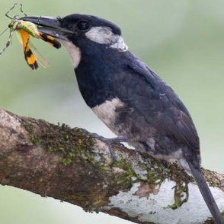

In [ ]:
# Let's view an image
from IPython.display import Image
print(filepath_train[-1])
print(labels_train[-1])
Image(filepath_train[-1])

/content/drive/MyDrive/birds_species/train/BANANAQUIT/161.jpg
BANANAQUIT


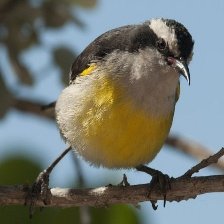

In [ ]:
print(filepath_train[9000])
print(labels_train[9000])
Image(filepath_train[9000])

In [ ]:
import numpy as np
labels_train_np = np.array(labels_train)
print(type(labels_train_np))
print(labels_train_np)
print(len(labels_train_np))

<class 'numpy.ndarray'>
['ABBOTTS BABBLER' 'ABBOTTS BABBLER' 'ABBOTTS BABBLER' ...
 'BLACK BREASTED PUFFBIRD' 'BLACK BREASTED PUFFBIRD'
 'BLACK BREASTED PUFFBIRD']
84635


In [ ]:
# See if number of labels matches the number of filenames
if len(labels_train_np) == len(filepath_train):
  print("Number of labels matches number of pathnames!")
else:
  print("Number of labels does not match number of pathnames, check data directories!")

Number of labels matches number of pathnames!


In [ ]:
unique_labels = np.unique(labels_train_np)
unique_labels[:10]

array(['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL',
       'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO',
       'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER',
       'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS'],
      dtype='<U29')

In [ ]:
len(unique_labels)

525

In [ ]:
# Turn a single label into an array of booleans

print('Len of labels_train_np:', len(labels_train_np))
print('Len of unique_labels:', len(unique_labels))
print('type of labels_train_np:', type(labels_train_np))
print('type of unique_labels:', type(unique_labels))
labels_train_np[84000] == unique_labels

Len of labels_train_np: 84635
Len of unique_labels: 525
type of labels_train_np: <class 'numpy.ndarray'>
type of unique_labels: <class 'numpy.ndarray'>


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
# Turn every label into a boolean array
boolean_labels_train = [label == unique_labels for label in labels_train_np]
boolean_labels_train[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [ ]:
len(boolean_labels_train)

84635

In [ ]:
# Example: Turning boolean array into integers
print(labels_train_np[7]) # original label
print(np.where(unique_labels == labels_train_np[7])) # index where label occurs
print(boolean_labels_train[7].argmax()) # index where label occurs in boolean array
print(boolean_labels_train[7].astype(int)) # there will be a 1 where the sample label occurs

ABBOTTS BABBLER
(array([0]),)
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
print(labels_train_np[7000])
print(boolean_labels_train[7000].astype(int))

AUSTRAL CANASTERO
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

# Create Validation Set

In [ ]:
# Create filepath of my valdation data

filepath_valid = ['/content/drive/MyDrive/birds_species/' + fpath for fpath, dataset in zip(birds_csv['filepaths'], birds_csv['data set']) if dataset == 'valid']
filepath_valid[:10]

['/content/drive/MyDrive/birds_species/valid/ABBOTTS BABBLER/1.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BABBLER/2.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BABBLER/3.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BABBLER/4.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BABBLER/5.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BOOBY/1.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BOOBY/2.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BOOBY/3.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BOOBY/4.jpg',
 '/content/drive/MyDrive/birds_species/valid/ABBOTTS BOOBY/5.jpg']

In [ ]:
len(filepath_valid)

2625

In [ ]:
labels_valid = [label for label, dataset in zip(birds_csv['labels'], birds_csv['data set']) if dataset == 'valid']
labels_valid[-5:]

['BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD',
 'BLACK BREASTED PUFFBIRD']

In [ ]:
len(labels_valid)

2625

/content/drive/MyDrive/birds_species/valid/BLACK BREASTED PUFFBIRD/5.jpg
BLACK BREASTED PUFFBIRD


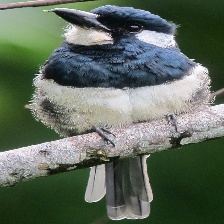

In [ ]:
# Let's view an image

print(filepath_valid[-1])
print(labels_valid[-1])
Image(filepath_valid[-1])

/content/drive/MyDrive/birds_species/valid/CURL CRESTED ARACURI/5.jpg
CURL CRESTED ARACURI


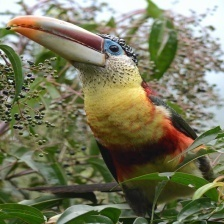

In [ ]:
print(filepath_valid[900])
print(labels_valid[900])
Image(filepath_valid[900])

In [ ]:
labels_valid_np = np.array(labels_valid)
len(labels_valid_np)

2625

In [ ]:
# Turn every valid label into a boolean array
boolean_labels_valid = [label == unique_labels for label in labels_valid_np]
boolean_labels_valid[0]

In [ ]:
len(boolean_labels_valid)

2625

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES_TRAIN = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [ ]:
NUM_IMAGES_VALID = 200 #@param {type:"slider", min:100, max:1000, step:100}


In [ ]:
NUM_IMAGES_TRAIN , NUM_IMAGES_VALID

(1000, 200)

# Preprocesing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn on `image` (a jpg) into Tensors
5. Return the modified `image`



Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filepath_train[999])
image.shape

(224, 224, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[168, 170, 165],
        [169, 171, 166],
        [170, 172, 167],
        ...,
        [220, 217, 210],
        [220, 217, 208],
        [220, 217, 208]],

       [[169, 171, 166],
        [170, 172, 167],
        [171, 173, 168],
        ...,
        [221, 218, 211],
        [221, 218, 209],
        [221, 218, 209]]], dtype=uint8)

In [ ]:
# Turn image into a tensor
tf.constant(image)
image[:2]

array([[[168, 170, 165],
        [169, 171, 166],
        [170, 172, 167],
        ...,
        [220, 217, 210],
        [220, 217, 208],
        [220, 217, 208]],

       [[169, 171, 166],
        [170, 172, 167],
        [171, 173, 168],
        ...,
        [221, 218, 211],
        [221, 218, 209],
        [221, 218, 209]]], dtype=uint8)

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn on `image` (a jpg) into Tensors
4. Normalize our image(convert color channel values from 0-255 to 0-1)
5. Return the modified `image`

In [ ]:
# We are going to skip the resize because our dataset have already this size 224 x 224

# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

# Creating data batches

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
X_train = filepath_train        #[:NUM_IMAGES_TRAIN]
y_train = boolean_labels_train  #[:NUM_IMAGES_TRAIN]
X_val = filepath_valid          #[:NUM_IMAGES_VALID]
y_val = boolean_labels_valid    #[:NUM_IMAGES_VALID]

print(type(X_train), type(y_train), type(X_val), type(y_val))
print(len(X_train), len(y_train), len(X_val), len(y_val))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>
84635 84635 2625 2625


In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 525), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 525), dtype=tf.bool, name=None)))

# Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_labels[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

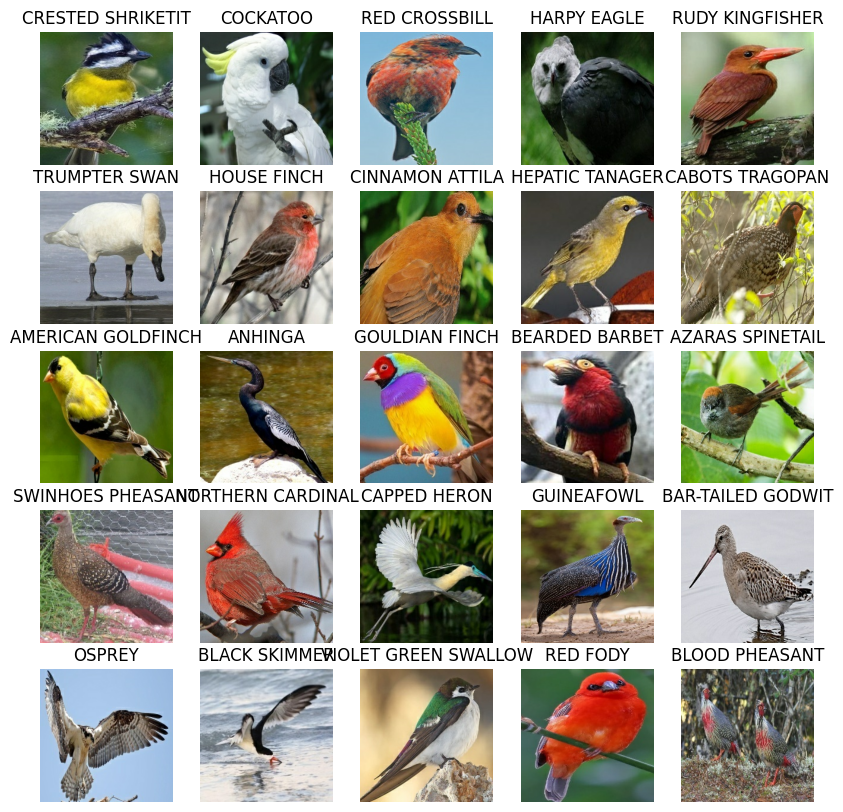

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Extracting 50 Images from each Class for a shorter training

In [ ]:
import os
import random

def extract_images_from_classes(base_dir, num_images=50):
    """
    Extracts a specific number of images from each class directory.

    Parameters:
    - base_dir (str): Path to the base directory containing class directories.
    - num_images (int, optional): Number of images to extract from each class. Defaults to 100.

    Returns:
    - List[str]: List of file paths to the extracted images.
    """

    # Ensure the base directory ends with a '/'
    if not base_dir.endswith('/'):
        base_dir += '/'

    all_image_paths = []

    # Iterate over each class directory
    for class_dir in os.listdir(base_dir):
        class_dir_path = os.path.join(base_dir, class_dir)

        if os.path.isdir(class_dir_path):
            # List all image files in the class directory
            image_files = [f for f in os.listdir(class_dir_path) if os.path.isfile(os.path.join(class_dir_path, f))]

            # Shuffle the image list (to ensure random selection) and take the first 'num_images' images
            #random.shuffle(image_files)
            selected_images = image_files[:num_images]

            # Add selected image paths to the master list
            all_image_paths.extend([os.path.join(class_dir_path, img) for img in selected_images])

    return all_image_paths

# Example usage in Google Colab:
#base_directory = "/content/Train"
#extracted_images = extract_images_from_classes(base_directory)
#print(extracted_images)


In [ ]:
train_directory = '/content/drive/MyDrive/birds_species/train'
filepath_train_50 = extract_images_from_classes(train_directory)
len(filepath_train_50)

26250

In [ ]:
filepath_train_50[:10]

['/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/086.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/077.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/094.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/071.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/160.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/011.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/061.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/070.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/005.jpg',
 '/content/drive/MyDrive/birds_species/train/ABBOTTS BABBLER/042.jpg']

In [ ]:
filepath_train_50[-10:]

['/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/6.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/80.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/35.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/51.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/85.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/149.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/25.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/128.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/125.jpg',
 '/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/139.jpg']

In [ ]:
import os

def extract_class_names_from_paths(image_paths):
    """
    Extracts class names from a list of image paths.

    Parameters:
    - image_paths (List[str]): List of file paths to images.

    Returns:
    - List[str]: List of class names.
    """

    class_names = []
    for path in image_paths:
        # Split the path into directories
        path_parts = path.split(os.path.sep)

        # Assuming the class name is always the second to last part of the path
        class_name = path_parts[-2]
        class_names.append(class_name)

    return class_names

# Example usage:
#paths = ['/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/6.jpg',
#         '/content/drive/MyDrive/birds_species/train/ANOTHER BIRD/7.jpg']

#print(extract_class_names_from_paths(paths))

In [ ]:
labels_train_50 = extract_class_names_from_paths(filepath_train_50)
labels_train_50[:20]

['ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER']

In [ ]:
len(filepath_train_50), len(labels_train_50)

(26250, 26250)

In [ ]:
filepath_train_50[26249], labels_train_50[26249]

('/content/drive/MyDrive/birds_species/train/ZEBRA DOVE/139.jpg', 'ZEBRA DOVE')

In [ ]:
labels_train_50_np = np.array(labels_train_50)
boolean_labels_train_50 = [label == unique_labels for label in labels_train_50_np]
len(boolean_labels_train_50)

26250

In [ ]:
boolean_labels_train_50[26249]

# Let's validate if all our path exists

In [ ]:
import os

def check_all_paths_exist(paths):
    """
    Check if all paths in the provided list exist in the current environment.

    Parameters:
    - paths (List[str]): List of file paths to check.

    Returns:
    - bool: True if all paths exist, otherwise False.
    - List[str]: List of paths that do not exist.
    """

    non_existent_paths = [path for path in paths if not os.path.exists(path)]

    # If non_existent_paths list is empty, it means all paths exist
    all_exist = len(non_existent_paths) == 0
    return all_exist, non_existent_paths


In [ ]:
check_all_paths_exist(filepath_train)

(True, [])

In [ ]:
check_all_paths_exist(filepath_valid)

(True, [])

# Creating X an y data from first Train with 50 images per class

In [ ]:
X_train_50 = filepath_train_50        #[:NUM_IMAGES_TRAIN]
y_train_50 = boolean_labels_train_50  #[:NUM_IMAGES_TRAIN]
X_val = filepath_valid          #[:NUM_IMAGES_VALID]
y_val = boolean_labels_valid    #[:NUM_IMAGES_VALID]

print(type(X_train_50), type(y_train_50), type(X_val), type(y_val))
print(len(X_train_50), len(y_train_50), len(X_val), len(y_val))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>
26250 26250 2625 2625


In [ ]:
# Create training and validation data batches
train_data_50 = create_data_batches(X_train_50, y_train_50)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data_50.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 525), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 525), dtype=tf.bool, name=None)))

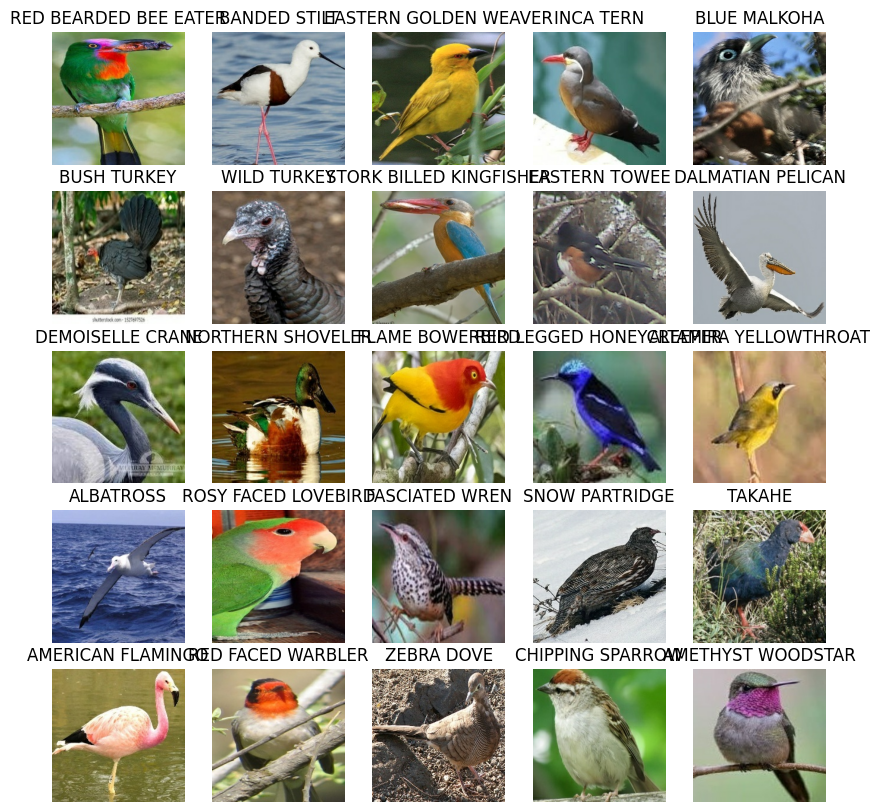

In [ ]:
# Visualize training images from the training data batch
train_images_50, train_labels_50 = next(train_data_50.as_numpy_iterator())
show_25_images(train_images_50, train_labels_50)

#Creating and training a model

In [ ]:
IMG_SIZE = 224

# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_labels) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 525)               526050    
                                                                 
Total params: 5,958,763
Trainable params: 526,050
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements


In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 10 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data_50,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/10
821/821 [==============================] - 210s 251ms/step - loss: 1.8146 - accuracy: 0.6446 - val_loss: 0.6342 - val_accuracy: 0.8575
Epoch 2/10
821/821 [==============================] - 61s 74ms/step - loss: 0.3938 - accuracy: 0.9092 - val_loss: 0.5050 - val_accuracy: 0.8728
Epoch 3/10
821/821 [==============================] - 67s 81ms/step - loss: 0.1860 - accuracy: 0.9616 - val_loss: 0.4707 - val_accuracy: 0.8750
Epoch 4/10
821/821 [==============================] - 61s 75ms/step - loss: 0.1013 - accuracy: 0.9823 - val_loss: 0.4646 - val_accuracy: 0.8789
Epoch 5/10
821/821 [==============================] - 69s 84ms/step - loss: 0.0595 - accuracy: 0.9919 - val_loss: 0.4542 - val_accuracy: 0.8838
Epoch 6/10
821/821 [==============================] - 62s 76ms/step - loss: 0.0365 - accuracy: 0.9960 - val_loss: 0.4466 - val_accuracy: 0.8827
Epoch 7/10
821/821 [=====================

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 525), dtype=tf.bool, name=None))>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

83/83 [==============================] - 10s 108ms/step


array([[3.22064647e-04, 8.97413394e-11, 7.49751594e-10, ...,
        7.27118143e-10, 1.20655241e-09, 4.84600271e-08],
       [2.84203678e-01, 4.35239365e-08, 2.69169298e-10, ...,
        1.16646328e-08, 1.09637575e-07, 3.48802320e-10],
       [5.47086112e-02, 5.23104084e-08, 1.19979804e-10, ...,
        5.64711078e-09, 1.31377180e-06, 1.59322212e-07],
       ...,
       [1.30713895e-11, 1.31461411e-12, 8.41245476e-13, ...,
        3.06923351e-13, 3.00089966e-12, 3.91886489e-11],
       [9.11103739e-14, 1.91668242e-13, 4.29528375e-15, ...,
        8.78942492e-12, 1.27469493e-10, 7.79520615e-11],
       [1.12088667e-08, 1.75954269e-11, 2.12519766e-10, ...,
        2.77069645e-10, 1.82783594e-10, 3.38128237e-09]], dtype=float32)

In [ ]:
predictions[0]

array([3.22064647e-04, 8.97413394e-11, 7.49751594e-10, 3.48727228e-11,
       3.24897059e-07, 2.14538941e-05, 3.40961948e-09, 3.72592894e-11,
       3.72579789e-09, 1.05357223e-10, 5.82765155e-02, 1.11723679e-10,
       7.40427640e-04, 8.09849465e-10, 8.30710847e-12, 6.50458354e-09,
       5.85456405e-07, 1.41638320e-05, 2.23481122e-10, 1.06959721e-12,
       2.42396993e-07, 2.97707692e-10, 2.46857712e-03, 3.15413665e-04,
       2.81142096e-08, 8.93219318e-11, 6.66674268e-12, 2.20140866e-08,
       4.46681923e-07, 7.79868525e-09, 4.28172279e-05, 5.83922688e-10,
       4.04816493e-02, 1.56144644e-08, 1.72125763e-08, 5.51477633e-03,
       1.01962605e-09, 3.50962291e-05, 9.09867413e-06, 1.13706289e-09,
       6.92273017e-10, 2.39983533e-10, 4.91800108e-11, 3.66975395e-10,
       5.50484769e-02, 4.28168976e-04, 4.71621007e-07, 1.03066579e-01,
       1.82286269e-10, 2.64621236e-09, 8.47934274e-08, 8.69924063e-11,
       4.37466774e-08, 7.96020527e-10, 7.53834981e-11, 1.69608843e-08,
      

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_labels[np.argmax(predictions[index])]}")

[6.16590379e-09 1.15579881e-11 4.79374916e-12 4.52722482e-09
 1.80395454e-09 6.98722746e-10 2.25021685e-11 1.83450288e-09
 9.90732431e-01 6.14586333e-12 7.06080794e-09 1.14859218e-12
 5.56832414e-10 1.83030785e-10 6.63038124e-10 1.93075578e-09
 9.51786205e-09 2.02457343e-12 1.33618494e-08 1.73406775e-10
 1.37180706e-07 2.20128160e-09 3.20330901e-06 3.66467812e-09
 5.74523824e-07 1.59907589e-08 2.12180908e-07 6.97003043e-06
 1.05554357e-10 4.28974564e-11 9.11457465e-10 9.71789652e-14
 1.30221099e-06 3.18734408e-08 4.92968666e-10 2.02422801e-10
 9.75172304e-11 1.86804403e-08 1.16914824e-08 7.08168302e-10
 5.64360082e-13 3.28151312e-10 6.63222754e-10 2.53126131e-11
 1.43588483e-11 2.82910001e-10 7.49875028e-07 1.08853824e-08
 4.16625445e-09 8.26077262e-11 2.34776032e-10 7.15188678e-14
 7.99678310e-06 1.26331293e-10 2.76370621e-10 1.35712785e-09
 2.75476447e-10 4.96868608e-07 5.73428693e-10 2.42571685e-10
 2.40915938e-06 1.08389120e-08 1.03779332e-08 7.42818600e-07
 4.15401331e-08 5.769431

In [ ]:
unique_labels[8]

'AFRICAN PYGMY GOOSE'

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'AMERICAN COOT'

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.69411767, 0.67058825, 0.5686275 ],
         [0.7176471 , 0.69411767, 0.5921569 ],
         [0.7254902 , 0.7019608 , 0.60784316],
         ...,
         [0.69803923, 0.7019608 , 0.7725491 ],
         [0.69803923, 0.7019608 , 0.7725491 ],
         [0.69411767, 0.69803923, 0.7686275 ]],
 
        [[0.7058824 , 0.68235296, 0.5882353 ],
         [0.73333335, 0.70980394, 0.6156863 ],
         [0.7411765 , 0.7176471 , 0.62352943],
         ...,
         [0.7019608 , 0.7058824 , 0.77647066],
         [0.6862745 , 0.6901961 , 0.7607844 ],
         [0.69411767, 0.69803923, 0.7686275 ]],
 
        [[0.7176471 , 0.69411767, 0.60784316],
         [0.75294125, 0.7294118 , 0.6431373 ],
         [0.76470596, 0.7411765 , 0.654902  ],
         ...,
         [0.7137255 , 0.72156864, 0.7803922 ],
         [0.69411767, 0.69803923, 0.7686275 ],
         [0.7058824 , 0.70980394, 0.7803922 ]],
 
        ...,
 
        [[0.58431375, 0.53333336, 0.45882356],
         [0.6666667 , 0.6156863 , 0.54117

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "black"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


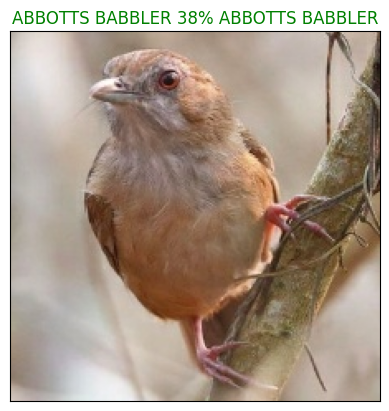

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=4)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

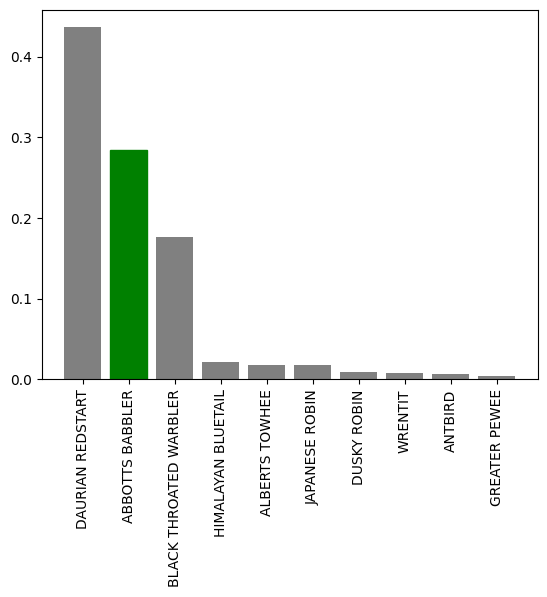

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=1)

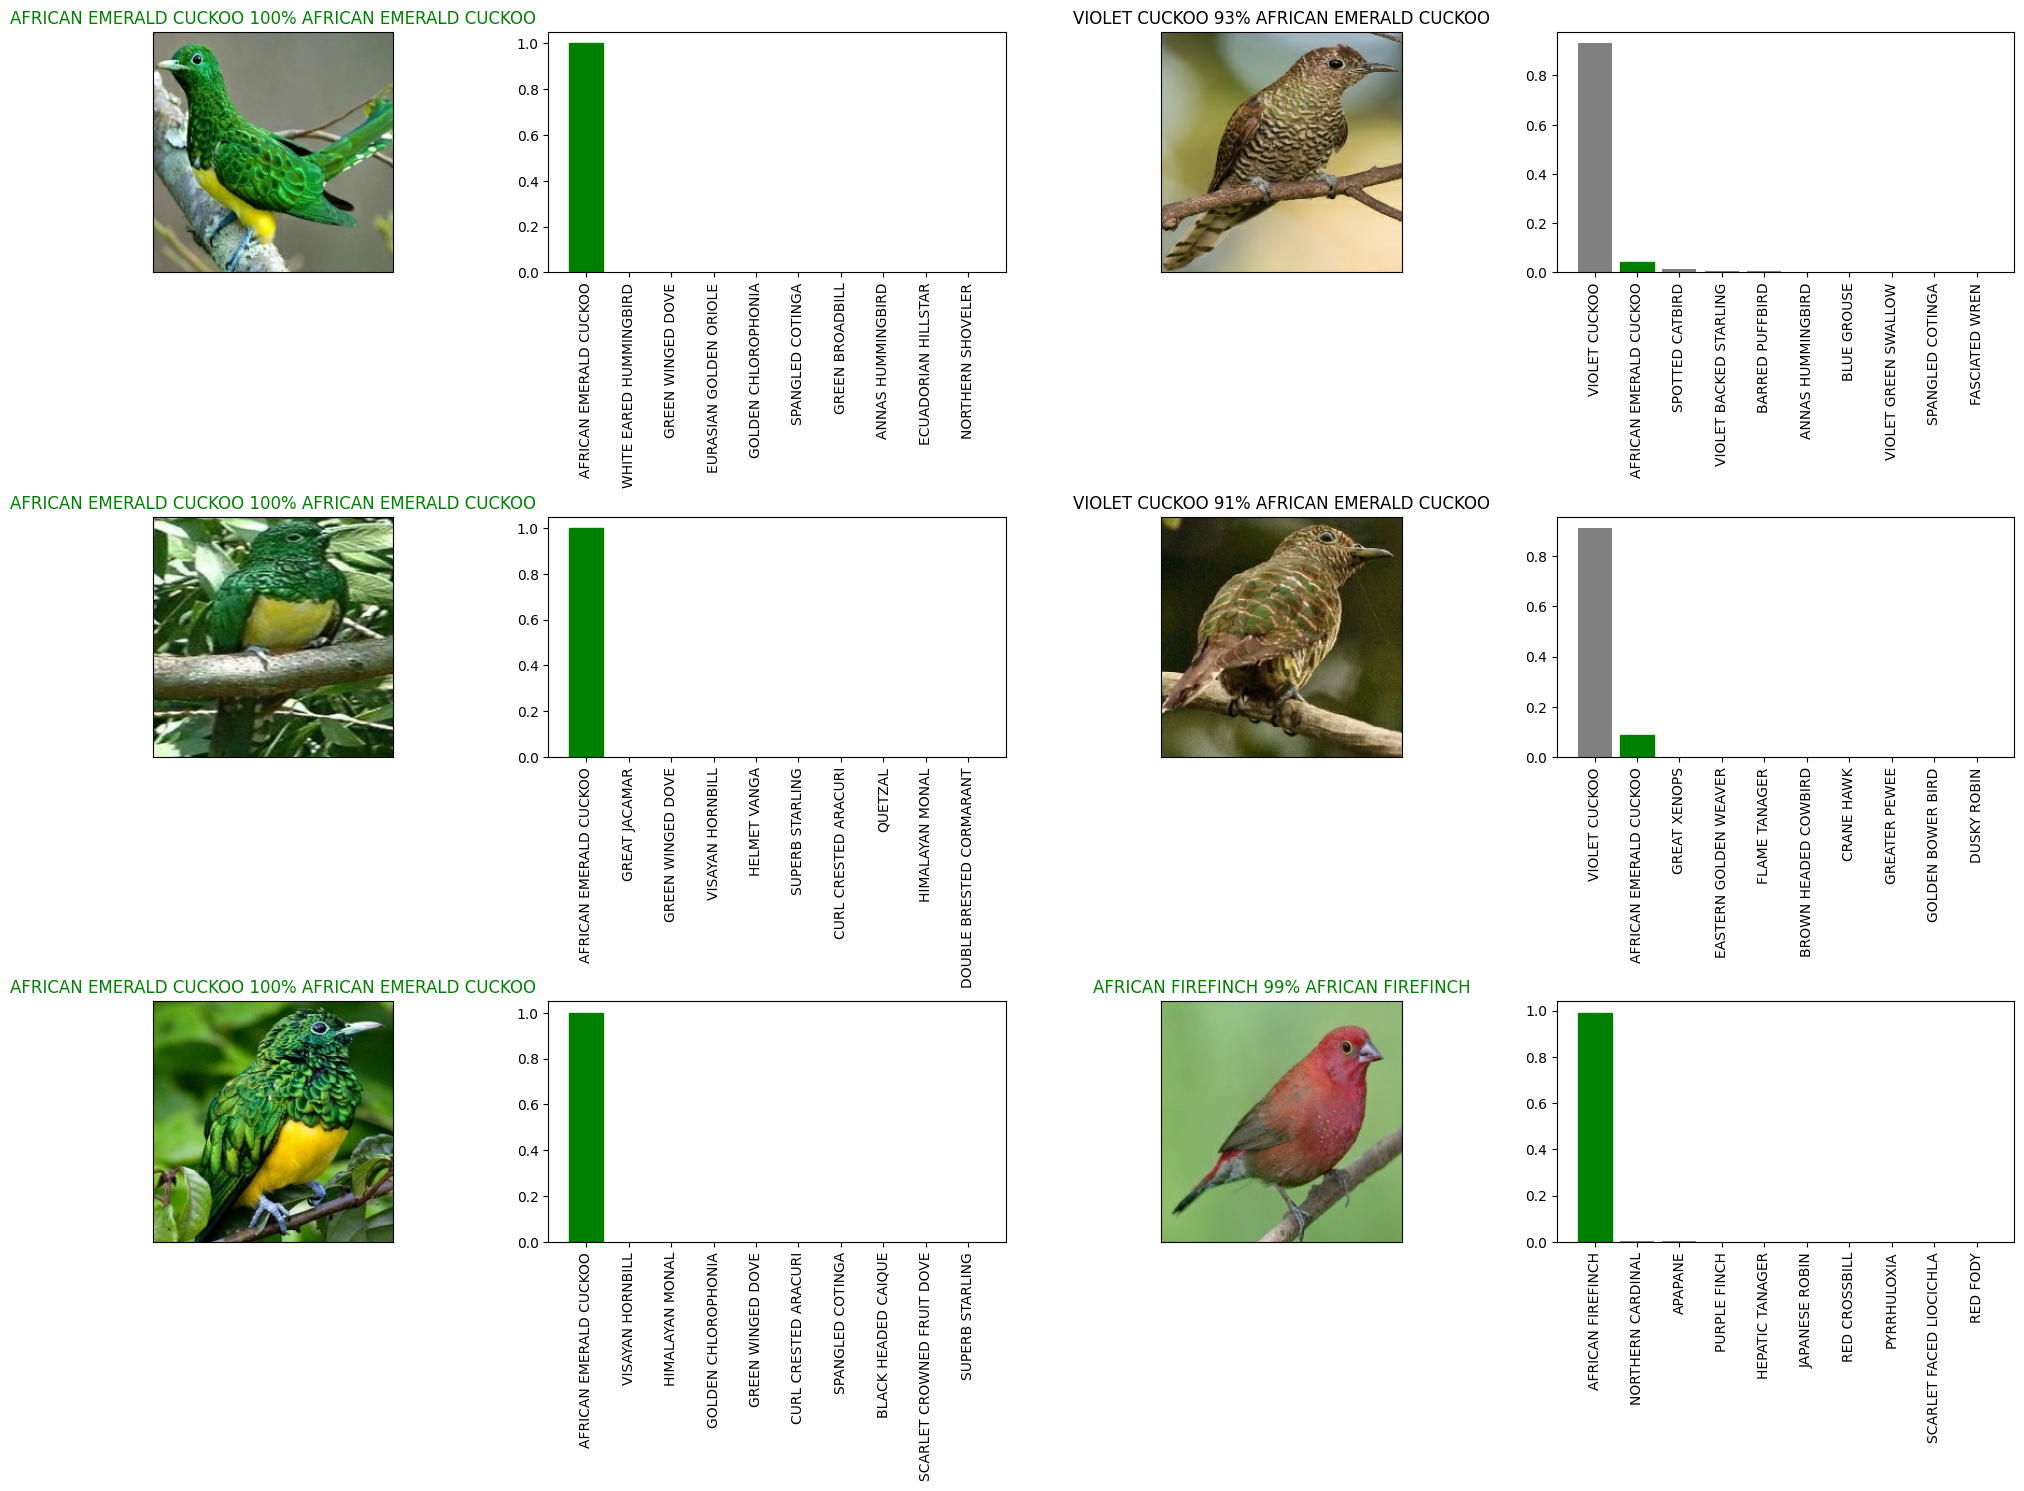

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/birds_species/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="26250-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/birds_species/models/20230817-03001692241218-26250-images-mobilenetv2-Adam.h5...


'drive/My Drive/birds_species/models/20230817-03001692241218-26250-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_26250_image_model = load_model('drive/My Drive/birds_species/models/20230817-03001692241218-26250-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/birds_species/models/20230817-03001692241218-26250-images-mobilenetv2-Adam.h5
